In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [6]:
# reflect robots and get the new vertices of convex hull
def get_cspace_obstacle(rob, obs):
  x_diff = 0
  y_diff = 0
  if rob[0] != (0,0):
    x_diff = rob[0][0] - 0
    y_diff = rob[0][1] - 0
  rob_reflect = [(-(each[0] - x_diff), -(each[1] - y_diff)) for each in rob]
  new_vertices = obs.copy()
  for vertice in obs:
    x_diff = rob_reflect[0][0] - vertice[0]
    y_diff = rob_reflect[0][1] - vertice[1]
    for each in rob_reflect:
      if (each[0]-x_diff, each[1]-y_diff) not in new_vertices:
        new_vertices.append((each[0]-x_diff, each[1]-y_diff))
  return new_vertices
    


In [7]:
# draw the robot and obstacle before Minkowski sum
def robot_obstacle_before(rob, obs):
  rob_np = np.array(rob)
  obs_np = np.array(obs)
  plt.plot(rob_np[0,0], rob_np[0,1],'og')
  plt.text(rob_np[0,0]-1, rob_np[0,1]-1,'reference point')
  plt.fill(rob_np[1:,0], rob_np[1:,1],'b',obs_np[:,0],obs_np[:,1],'r',alpha = 0.5)
  plt.grid(linestyle = '--', linewidth = 0.5)
  plt.xlim((-3,3))
  plt.ylim((-3,3))
  plt.show()


In [4]:
# draw the C-space obstacle
def cspace_obstacle_convexhull(points):
  points = np.array(points)
  hull = ConvexHull(points)
  plt.plot(points[:,0], points[:,1],'o')
  for simplex in hull.simplices:
    plt.plot(points[simplex,0], points[simplex,1],'k-')
  plt.grid(linestyle = '--', linewidth = 0.5)
  plt.xlim((-3,3))
  plt.ylim((-3,3))
  plt.show()

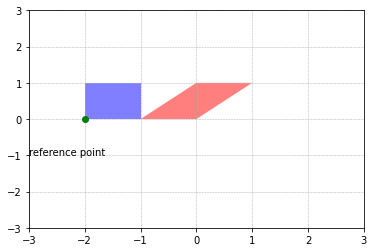

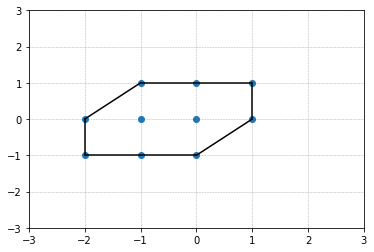

In [8]:
#Referenc point on the rob vertex
rob1 = [(-2,0),(-2,0),(-1,0),(-1,1),(-2,1)]
obs1 = [(-1,0),(0,0),(1,1),(0,1)]
points1 = get_cspace_obstacle(rob1,obs1)
robot_obstacle_before(rob1, obs1)
cspace_obstacle_convexhull(points1)

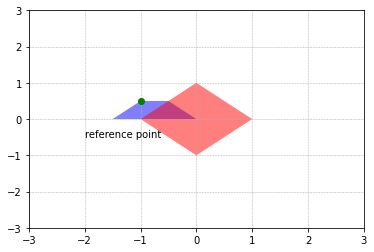

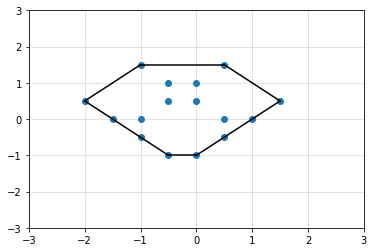

In [10]:
#More nontrivial shapes
rob2 = [(-1,0.5),(-1.5,0),(-1,0.5),(-0.5,0.5),(0,0)]
obs2 = [(-1,0),(0,1),(1,0),(0,-1)]
points2 = get_cspace_obstacle(rob2,obs2)
robot_obstacle_before(rob2, obs2)
cspace_obstacle_convexhull(points2)

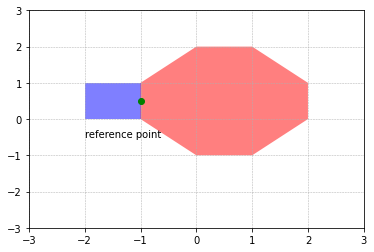

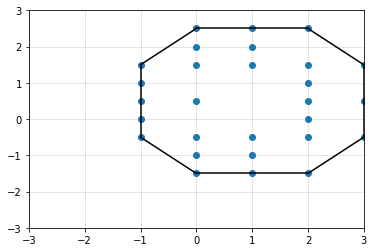

In [12]:
#Referenc point at the edge of robot
rob3 = [(-1,0.5),(-2,0),(-2,1),(-1,1),(-1,0)]
obs3 = [(-1,0),(-1,1),(0,2),(1,2),(2,1),(2,0),(1,-1),(0,-1)]
points3 = get_cspace_obstacle(rob3,obs3)
robot_obstacle_before(rob3, obs3)
cspace_obstacle_convexhull(points3)